## 確率変数を含む変分問題を深層展開で解く

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### グローバル変数の設定

In [2]:
δ = 0.05
β = 20.0
N = 100
T = 1.0
λ = 1000.0
train_itr = 250

250

### 放射基底関数の準備

In [3]:
function rbf_func(x, θ)
    rbf(x, β) = exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

rbf_func (generic function with 1 method)

In [4]:
function d_rbf_func(x, θ)
    d_rbf(x, β) = -2β*x*exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*d_rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

d_rbf_func (generic function with 1 method)

### 微分可能数値積分モジュール

In [5]:
function Integrate(T, N, θ, λ, α, β)
    Δt = T/N
    s = 0.0
    for i in 1:N
        y = rbf_func(i*Δt, θ)      
        y′ = d_rbf_func(i*Δt, θ)
        f = -(y^2 - (1+α+β*rand())*y′^2 + y*i*Δt)
        s += f*Δt # loss function 
    end
    s = s + λ*(rbf_func(0, θ) - 0.0)^2 + λ*(rbf_func(1, θ) - 0.0)^2　
    return s
end

Integrate (generic function with 1 method)

### 学習過程

In [6]:
opt = Flux.ADAM(1.0) 
function train(T, N, θ, ps, α, β)
    for i in 1:train_itr
        gs = Flux.gradient(ps) do
            Integrate(T, N, θ, λ, α, β)
        end
        Flux.Optimise.update!(opt, ps, gs)
    end
end

train (generic function with 1 method)

### 結果のプロット

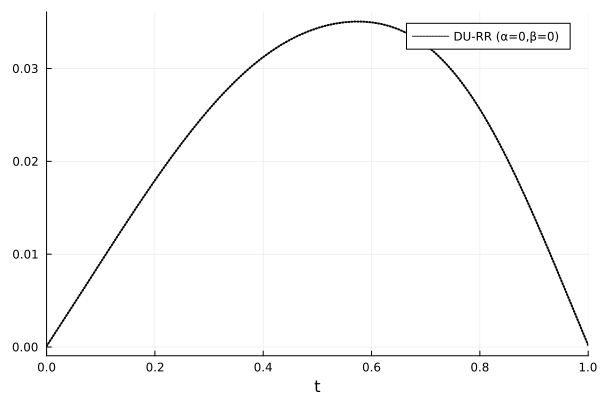

In [7]:
θ_train = ones(50)
ps = Flux.params(θ_train)
train(T, N, θ_train, ps, 0.0, 0.0)
plot(x->rbf_func(x, θ_train),  ls=:dot, lw=2, xlims=[0,1],label="DU-RR (α=0,β=0)", xlabel="t",color=:black)

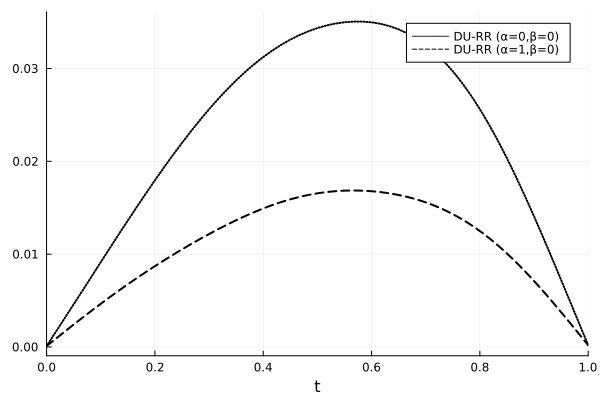

In [8]:
θ_train = ones(50)
ps = Flux.params(θ_train)
train(T, N, θ_train, ps, 1.0, 0.0)
plot!(x->rbf_func(x, θ_train),  ls=:dash, lw=2, xlims=[0,1],label="DU-RR (α=1,β=0)", xlabel="t",color=:black)

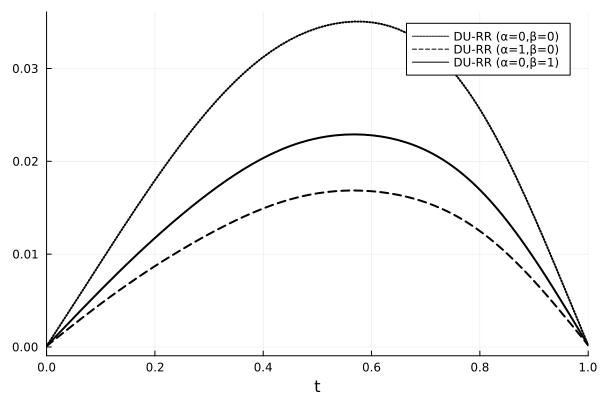

In [9]:
θ_train = ones(50)
ps = Flux.params(θ_train)
train(T, N, θ_train, ps, 0.0, 1.0)
plot!(x->rbf_func(x, θ_train),  ls=:solid, lw=2, xlims=[0,1],label="DU-RR (α=0,β=1)", xlabel="t",color=:black)

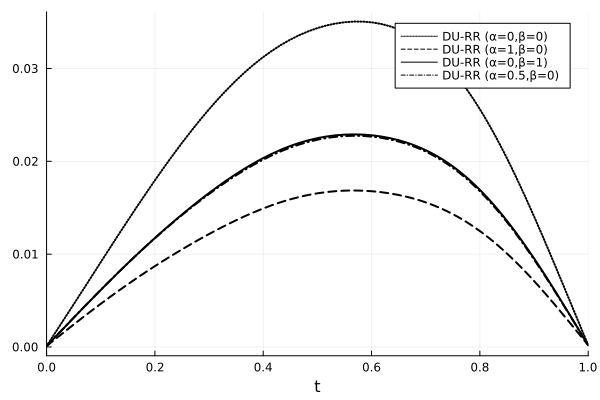

In [10]:
θ_train = ones(50)
ps = Flux.params(θ_train)
train(T, N, θ_train, ps, 0.5, 0.0)
plot!(x->rbf_func(x, θ_train),  ls=:dashdot, lw=2, xlims=[0,1],label="DU-RR (α=0.5,β=0)", xlabel="t",color=:black)

In [11]:
savefig("DU-RR-rand.pdf")

"/Users/wadayama/Dropbox/DU-Book_test/Chapter_6/DU-RR-rand.pdf"